In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Flatten

In [3]:
((train_data, train_labels),(test_data, test_labels)) = tf.keras.datasets.mnist.load_data()

In [4]:
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)
test_data = test_data/np.float32(255)
test_labels = test_labels.astype(np.int32)

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8])

In [8]:
model = K.Sequential([Flatten(input_shape=(28,28)),
                      Dense(10, activation = 'sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [10]:
history = model.fit(x=train_data,y=train_labels, epochs=50, verbose=1,validation_split=0.2) 

Epoch 1/50


C:\Users\aleks\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 6s 3ms/step - loss: 0.5046 - accuracy: 0.8695 - val_loss: 0.3152 - val_accuracy: 0.9147
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3171 - accuracy: 0.9115 - val_loss: 0.2873 - val_accuracy: 0.9202
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2934 - accuracy: 0.9176 - val_loss: 0.2762 - val_accuracy: 0.9240
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2816 - accuracy: 0.9216 - val_loss: 0.2734 - val_accuracy: 0.9252
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9235 - val_loss: 0.2693 - val_accuracy: 0.9237
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2679 - accuracy: 0.9254 - val_loss: 0.2640 - val_accuracy: 0.9278
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2638 - accuracy: 0.9260 - val_loss: 0.2673 - val_accuracy: 0.9273
Epo

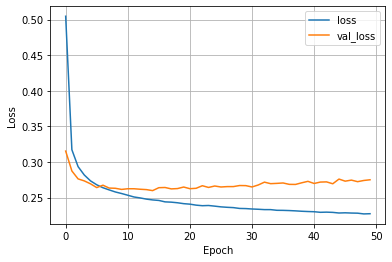

In [11]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [16]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Pred {} Conf: {:2.0f}% True ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

In [17]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predictions_label = np.argmax(predictions_array)
    
    thisplot[predictions_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [19]:
predictions = model.predict(test_data)

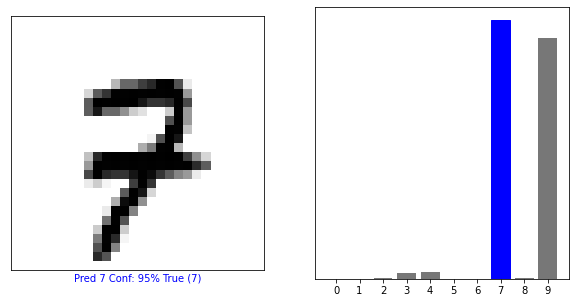

In [20]:
i=144
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

In [21]:
better_model = K.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10,activation='softmax')])
better_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [23]:
better_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = better_model.fit(x=train_data, y=train_labels, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10


C:\Users\aleks\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 4s 3ms/step - loss: 0.2832 - accuracy: 0.9183 - val_loss: 0.1608 - val_accuracy: 0.9534
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1278 - accuracy: 0.9621 - val_loss: 0.1108 - val_accuracy: 0.9682
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0871 - accuracy: 0.9743 - val_loss: 0.0947 - val_accuracy: 0.9720
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0642 - accuracy: 0.9803 - val_loss: 0.0902 - val_accuracy: 0.9726
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0505 - accuracy: 0.9848 - val_loss: 0.0855 - val_accuracy: 0.9740
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0385 - accuracy: 0.9885 - val_loss: 0.0848 - val_accuracy: 0.9749
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0300 - accuracy: 0.9913 - val_loss: 0.0864 - val_accuracy: 0.9749
Epo

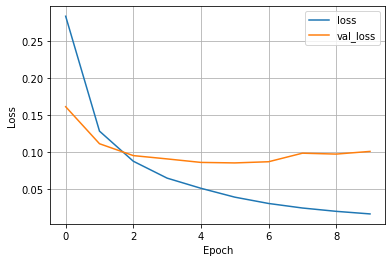

In [24]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

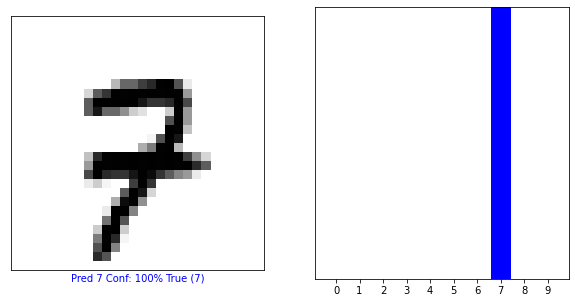

In [25]:
predictions = better_model.predict(test_data)
i = 144
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()